# Data profiling across python, dbt, and SQL

Python:  
- Import data, take a sample, check info, shape, head
- Use describe() to check for outliers
- Check for whitespaces in rows and column names
- Check cardinality of categorical columns with unique, nunique, value_counts, countplot to identify wrong values incorrect data types
- Distribution of numerical columns to check for outliers or weird values 
- Duplicates and null values

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import json,csv

## Import Data and sample

In [2]:
datasets_path = "C:/Users/Oamen/OneDrive/Documents/DATA PROJECTS/RetailXpress_data_warehouse/datasets"

csv_files = [(file, f'{datasets_path}/{file}') for file in os.listdir(datasets_path) if file.endswith('csv')]
json_files = [(file, f'{datasets_path}/{file}') for file in os.listdir(datasets_path) if file.endswith('json')]

### CSV

In [3]:
def sample_data(df:pd.DataFrame, n):
    
    """Make n sample of a pandas dataframe"""
    
    return df.sample(n, replace = True)

In [4]:
imported_samples = [(file_name, sample_data(pd.read_csv(file_path), 50000)) for file_name, file_path in csv_files]

In [5]:
def overview(file_name, df):
    
    print(file_name)
    
    print(df.info())
    
    print(df.shape)
    
    print(df.describe())
        
    return df[:5]

In [6]:
for file_name, df in imported_samples:
    
    print(overview(file_name, df))
    
    print('-----------------------------------------------------------------------------------------------------------')

customers.csv
<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 881913 to 465175
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     50000 non-null  object
 1   name            50000 non-null  object
 2   email           45019 non-null  object
 3   phone           50000 non-null  object
 4   loyalty_points  50000 non-null  int64 
 5   join_date       50000 non-null  object
dtypes: int64(1), object(5)
memory usage: 2.7+ MB
None
(50000, 6)
       loyalty_points
count    50000.000000
mean       498.428000
std        289.039059
min          0.000000
25%        248.000000
50%        498.000000
75%        749.000000
max        999.000000
                                 customer_id             name  \
881913  9f3f2d33-82fe-4194-8bf3-e369ba34e14e  Elizabeth Rivas   
566310  214f223f-67fb-4266-ac2d-5117f0411214       Scott Rios   
577489  39289a09-7fce-4309-a30e-723a46817012   Kristin Adkins

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 270 to 254
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   supplier_id   50000 non-null  object
 1   name          50000 non-null  object
 2   contact_info  50000 non-null  object
dtypes: object(3)
memory usage: 1.5+ MB
None
(50000, 3)
                                 supplier_id       name        contact_info
count                                  50000      50000               50000
unique                                   500        488                 500
top     ecfbe889-25f8-4f88-ba37-f084c3ff15dc  Moore PLC  (364)512-4960x9050
freq                                     127        234                 127
                              supplier_id                              name  \
270  7a9174ea-c7b9-4d34-b80b-f887a9efb9a7         Murray, Turner and Briggs   
429  b38e00d2-4d0d-4285-94ca-4c7ccd1eea1c  Contreras, Castro and Montgomery   
170  a1bb

In [7]:
def whitespace_check(file_name, df):
    
    print(file_name)
    
    print(f"Whitespace columns:{[column for column in df.columns if ' ' in column]}")
    
    empty_rows = {column: len(df[df[column] == ' ']) for column in df.columns}
    
    valid_empty_rows = {f'{file_name}_{column}': len_empty for column,len_empty in empty_rows.items() if len_empty>0}
    
    print(f"Number of empty rows :{valid_empty_rows}")

In [8]:
for file_name, df in imported_samples:
    
    whitespace_check(file_name, df) 

customers.csv
Whitespace columns:[]
Number of empty rows :{}
customer_preferences.csv
Whitespace columns:[]
Number of empty rows :{}
marketing_campaigns.csv
Whitespace columns:[]
Number of empty rows :{}
products.csv
Whitespace columns:[]
Number of empty rows :{}
product_metadata.csv
Whitespace columns:[]
Number of empty rows :{}
stores.csv
Whitespace columns:[]
Number of empty rows :{}
suppliers.csv
Whitespace columns:[]
Number of empty rows :{}


In [9]:
def duplicates_null_values(file_name, df):
    
    print(file_name)
    
    dups  = len(df[df.duplicated()])
    
    if dups > 0:
        
        print(f'{file_name} has {dups} duplicates')
    
    nulls = df.isnull()
    
    total_nulls = np.product(nulls.sum().sum()/(df.shape[0]*df.shape[1]))
    
    print(f'{total_nulls}% of data is missing in {file_name}')
    
    return nulls.mean()

In [10]:
for file_name, df in imported_samples:
    
    duplicates_null_values(file_name, df) 

customers.csv
customers.csv has 1291 duplicates
0.016603333333333335% of data is missing in customers.csv
customer_preferences.csv
customer_preferences.csv has 1224 duplicates
0.0% of data is missing in customer_preferences.csv
marketing_campaigns.csv
marketing_campaigns.csv has 49900 duplicates
0.0% of data is missing in marketing_campaigns.csv
products.csv
products.csv has 40064 duplicates
0.0% of data is missing in products.csv
product_metadata.csv
product_metadata.csv has 40077 duplicates
0.0% of data is missing in product_metadata.csv
stores.csv
stores.csv has 49500 duplicates
0.0% of data is missing in stores.csv
suppliers.csv
suppliers.csv has 49500 duplicates
0.0% of data is missing in suppliers.csv


In [11]:
def cardinality(file_name, df):
    
    print(file_name)
    
    objects = [column for column in df.columns if 'object' in str(df[column].dtype) or 'bool' in str(df[column].dtype)]
    
    num_unique = {column: df[column].nunique() for column in objects}
    
    uniques = {column: df[column].unique() for column, num_uniques in num_unique.items() if num_uniques<10}
    
    frequency = {column: df[column].value_counts(normalize = True) for column, num_uniques in uniques.items()}
    
    print(num_unique)
    print(uniques)
    print(frequency)
    
    plt.figure()
    
    for column in uniques:
        
        sns.countplot(data = df, x = column, palette = 'cool')

customers.csv
{'customer_id': 48709, 'name': 39400, 'email': 40484, 'phone': 48709, 'join_date': 1827}
{}
{}
customer_preferences.csv
{'customer_id': 48776, 'preferred_categories': 4, 'spending_patterns': 48776}
{'preferred_categories': array(['Groceries', 'Electronics', 'Furniture', 'Clothing'], dtype=object)}
{'preferred_categories': Clothing       0.25332
Furniture      0.25086
Groceries      0.24888
Electronics    0.24694
Name: preferred_categories, dtype: float64}
marketing_campaigns.csv
{'campaign_id': 100, 'campaign_name': 100, 'channels': 3, 'start_date': 92, 'end_date': 86, 'performance_metrics': 100}
{'channels': array(['Email', 'SMS', 'Social Media'], dtype=object)}
{'channels': Email           0.37304
SMS             0.34634
Social Media    0.28062
Name: channels, dtype: float64}
products.csv
{'product_id': 9936, 'name': 971, 'category': 4}
{'category': array(['Electronics', 'Furniture', 'Groceries', 'Clothing'], dtype=object)}
{'category': Furniture      0.25454
Groceries 

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

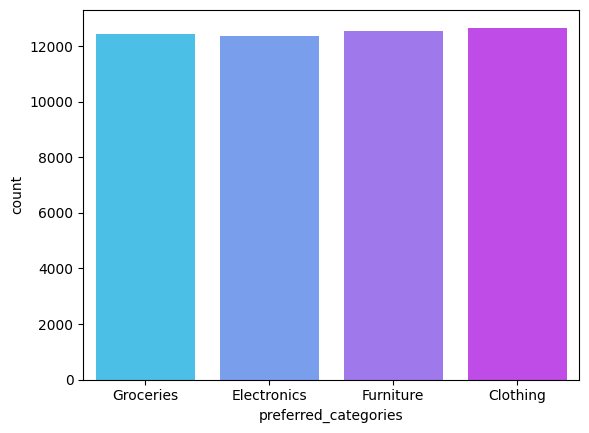

<Figure size 640x480 with 0 Axes>

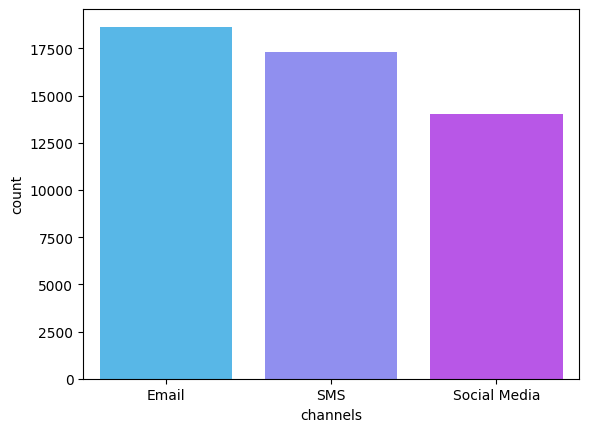

<Figure size 640x480 with 0 Axes>

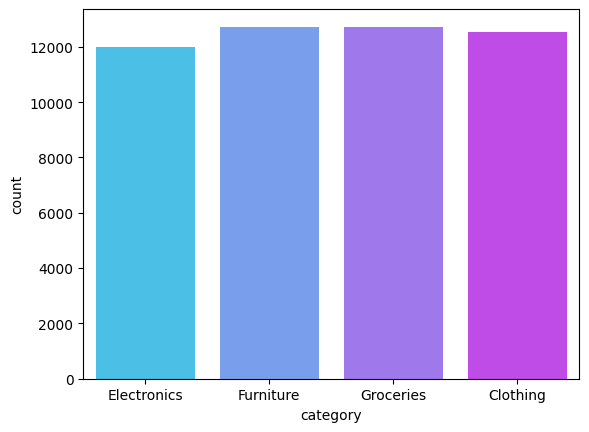

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

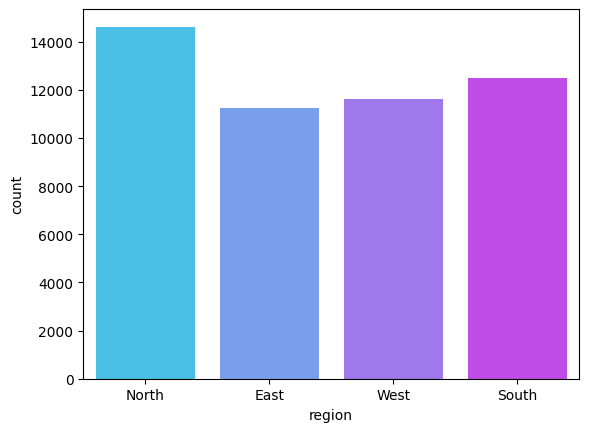

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [12]:
for file_name, df in imported_samples:
    
    plt.figure()
    cardinality(file_name, df) 

In [13]:
def distibution(file_name, df):
    
    print(file_name)
    
    numericals = [column for column in df.columns if 'int' in str(df[column].dtype) or 'float' in str(df[column].dtype)]

    plt.figure()
    
    for column in numericals:
        plt.figure()
        sns.histplot(data = df, x = column, palette = 'cool', kde = True)

customers.csv


C:\Users\Oamen\AppData\Local\Temp\ipykernel_25576\1653433778.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data = df, x = column, palette = 'cool', kde = True)


customer_preferences.csv
marketing_campaigns.csv
products.csv


C:\Users\Oamen\AppData\Local\Temp\ipykernel_25576\1653433778.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data = df, x = column, palette = 'cool', kde = True)
C:\Users\Oamen\AppData\Local\Temp\ipykernel_25576\1653433778.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data = df, x = column, palette = 'cool', kde = True)


product_metadata.csv
stores.csv
suppliers.csv


<Figure size 640x480 with 0 Axes>

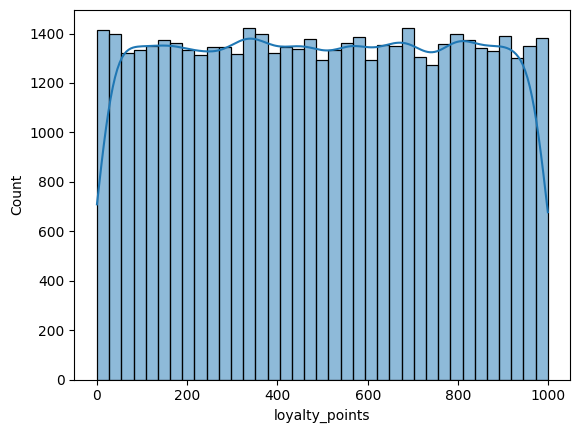

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

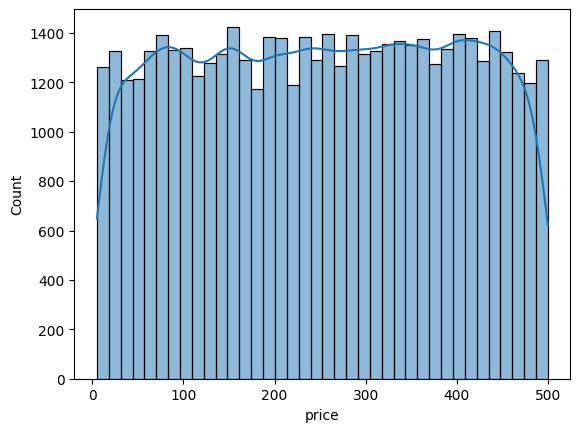

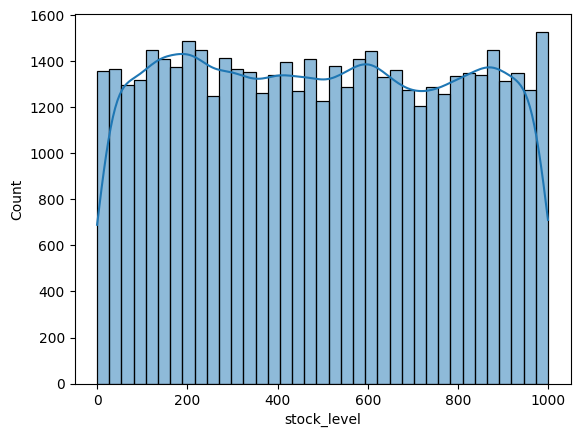

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [14]:
for file_name, df in imported_samples:
        
    distibution(file_name, df) 